In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix

In [2]:
# deterministic random data
np.random.seed(42)

In [3]:
#Loading the training data
train = pd.read_csv("train.csv", index_col = "PassengerId")

In [4]:
train.info()
#Some info are missing (age:714, cabin:204, embarked:889)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


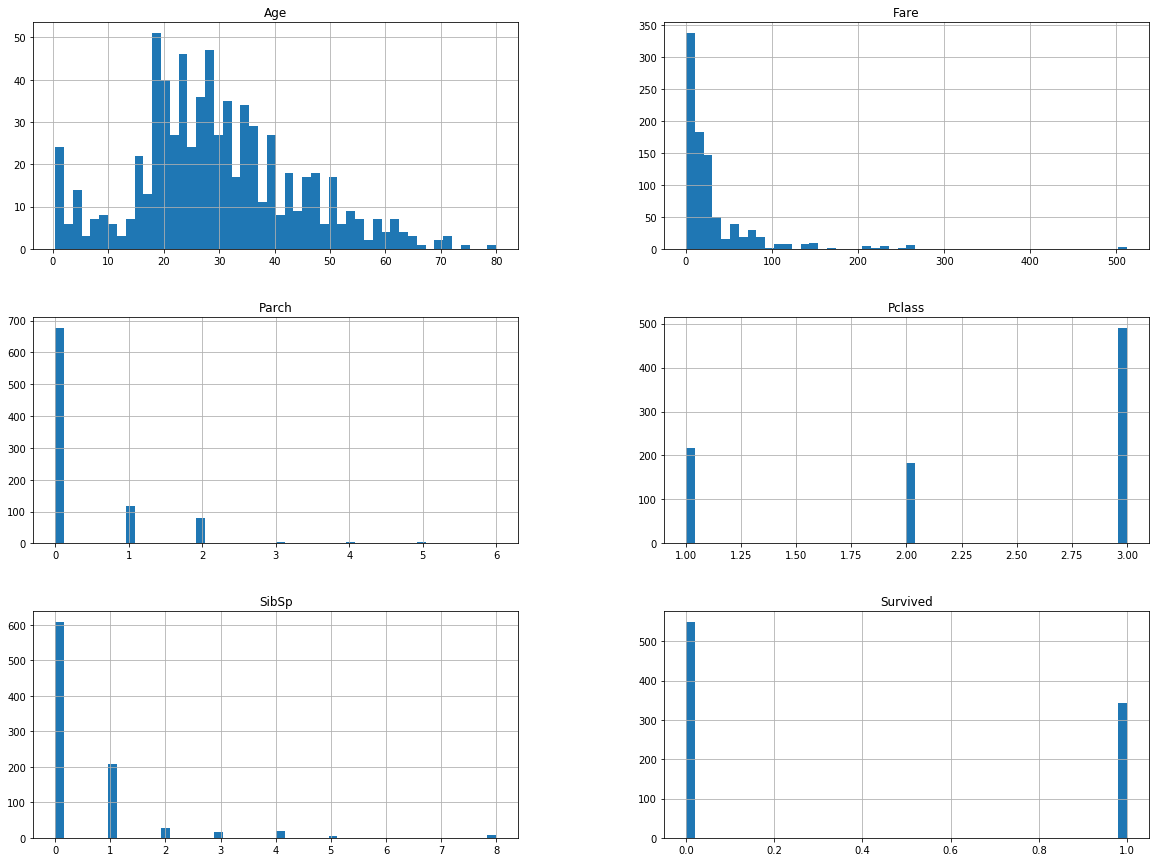

In [5]:
train.hist(bins=50, figsize=(20,15))
plt.show()

In [6]:
#Although there was some element of luck involved in surviving the sinking, 
#some groups of people were more likely to survive than others, such as women, 
#children, and the upper-class. https://www.kaggle.com/c/titanic

#adults
train["age_cat"] = 1
train["age_cat"].where(train["Age"] > 12, 0, inplace=True)
train["age_cat"].where(train["Age"] < 60, 2, inplace=True)
train.groupby("age_cat").count()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
age_cat,,,,,,,,,,,
0,69,69,69,69,69,69,69,69,69,11,69
1,619,619,619,619,619,619,619,619,619,161,618
2,203,203,203,203,26,203,203,203,203,32,202


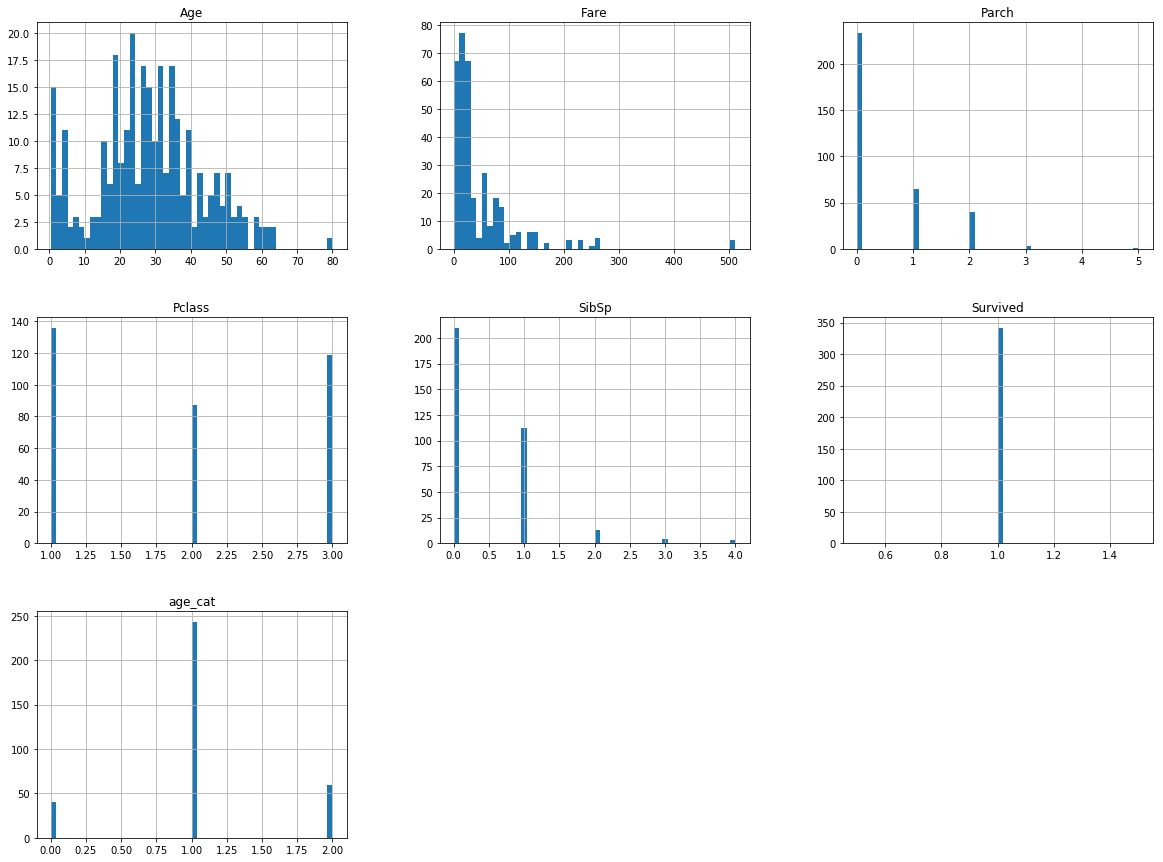

In [7]:
train[train["Survived"] == 1].hist(bins=50, figsize=(20,15))
plt.show()

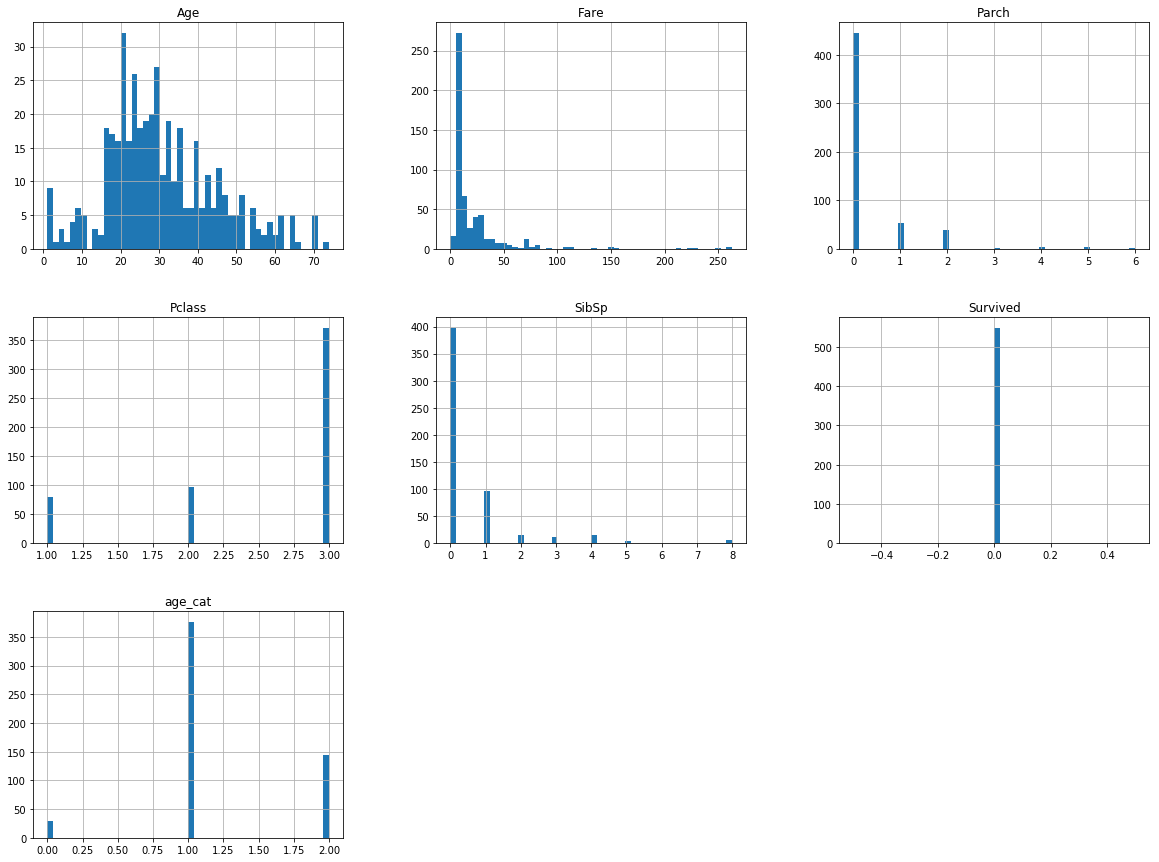

In [8]:
train[train["Survived"] == 0].hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
train[train["Survived"]==1].groupby("age_cat").count()["Survived"]/train[train["Survived"]==0].groupby("age_cat").count()["Survived"]

age_cat
0    1.379310
1    0.646277
2    0.409722
Name: Survived, dtype: float64

In [10]:
train[train["Survived"]==1].groupby("Sex").count()["Survived"]/train[train["Survived"]==0].groupby("Sex").count()["Survived"]

Sex
female    2.876543
male      0.232906
Name: Survived, dtype: float64

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


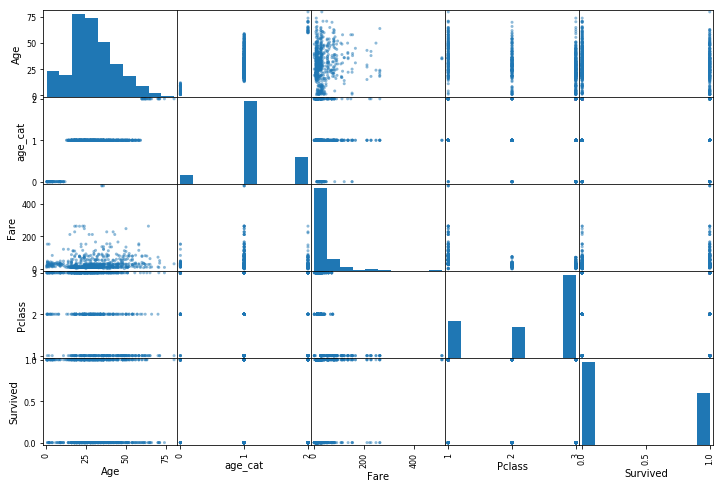

In [11]:
attributes = ["Age", "age_cat", "Fare", "Pclass", "Survived"]
##train[attributes].plot(kind="scatter", x="age_cat", y="Survived", alpha=0.1, figsize=(12, 8))
scatter_matrix(train[attributes], figsize=(12, 8))
plt.show()

In [12]:
train.groupby("Sex").count()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_cat
Sex,,,,,,,,,,,
female,314,314,314,261,314,314,314,314,97,312,314
male,577,577,577,453,577,577,577,577,107,577,577


In [13]:
train.groupby("Survived").describe()

Age                                                       Fare  \
          count       mean        std   min   25%   50%   75%   max  count   
Survived                                                                     
0         424.0  30.626179  14.172110  1.00  21.0  28.0  39.0  74.0  549.0   
1         290.0  28.343690  14.950952  0.42  19.0  28.0  36.0  80.0  342.0   

                    ...  SibSp      age_cat                                \
               mean ...    75%  max   count      mean       std  min  25%   
Survived            ...                                                     
0         22.117887 ...    1.0  8.0   549.0  1.209472  0.521282  0.0  1.0   
1         48.395408 ...    1.0  4.0   342.0  1.055556  0.535936  0.0  1.0   

                         
          50%  75%  max  
Survived                 
0         1.0  2.0  2.0  
1         1.0  1.0  2.0  

[2 rows x 48 columns]

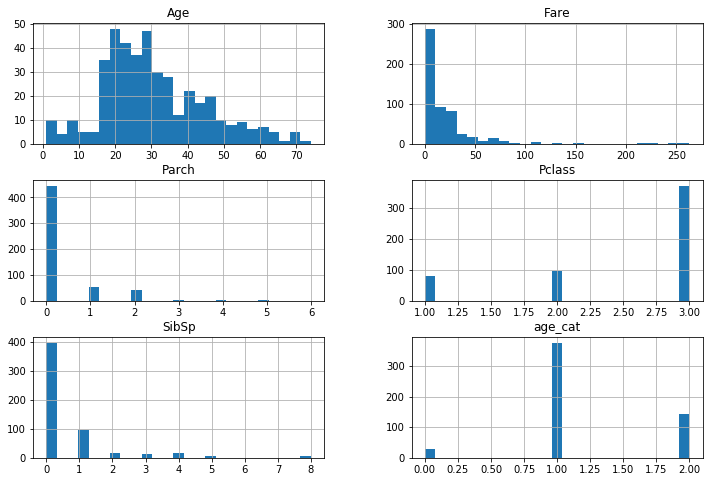

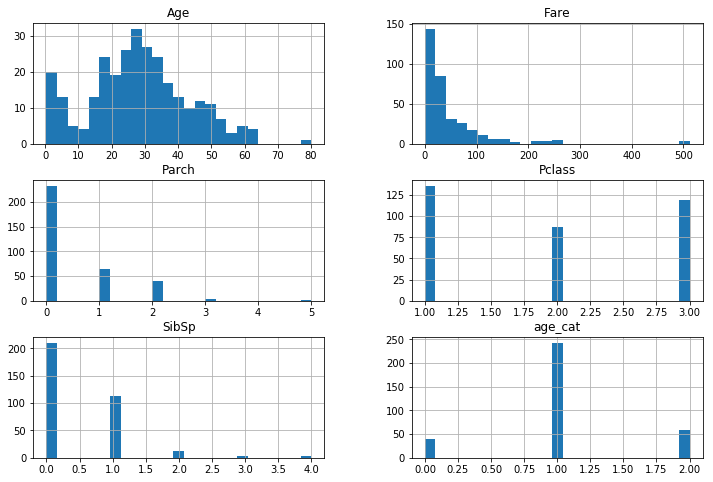

In [14]:
train.groupby("Survived").hist(bins=25,figsize=(12, 8))
plt.show()

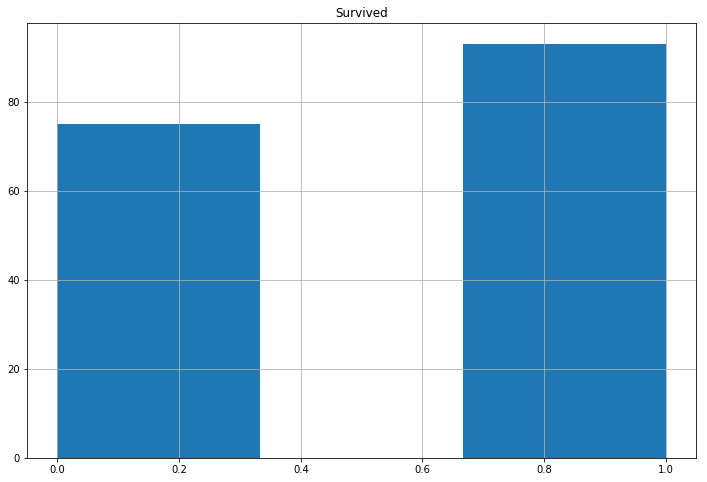

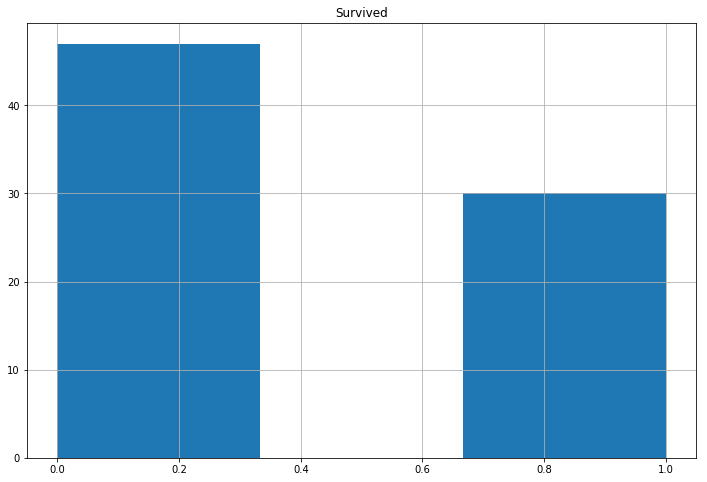

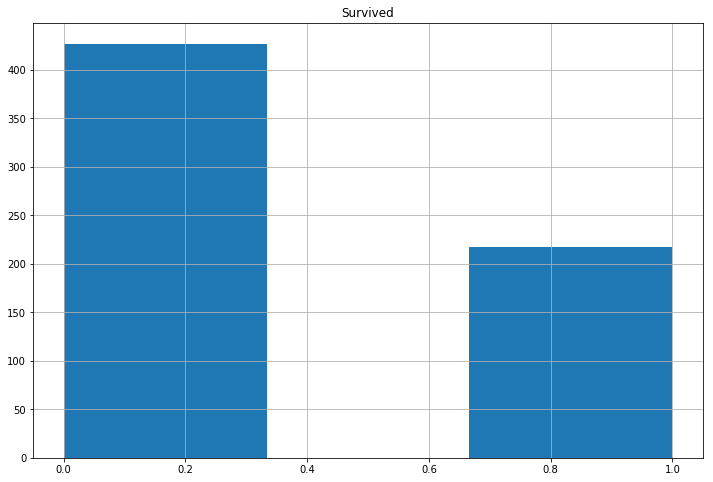

In [15]:
train[["Survived","Embarked"]].groupby("Embarked").hist(bins=3,figsize=(12, 8))
plt.show()

In [16]:
attributes = ["Survived", "Pclass", "Sex", "Age","SibSp","Parch","Fare"]

In [17]:
#once a model is build, your kaggle submission can be build
def submit_result(model, features):
  test = pd.read_csv("test.csv", index_col = "PassengerId")
  t_encoded = pd.get_dummies(test[["Pclass", "Sex", "Age","SibSp","Parch","Fare"]])
  age_median = t_encoded["Age"].median()
  t_encoded["Age"].fillna(age_median, inplace=True)
  fare_median = t_encoded["Fare"].median()
  t_encoded["Fare"]=fare_median
  test["Survived"] = model.predict(scaler.fit_transform(t_encoded[features]))
  test['Survived'].to_csv("result_2.csv")

In [18]:
train_encoded = pd.get_dummies(train[attributes])
age_median = train_encoded["Age"].median()
train_encoded["Age"].fillna(age_median, inplace=True)

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
train_index, test_index = next(split.split(train, train["Sex"]))

In [20]:
strat_train_set = train_encoded.iloc[train_index]
strat_test_set = train_encoded.iloc[test_index]

In [21]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

def test_models(features, labels):
    sgd_clf = SGDClassifier(random_state=42)
    scores = cross_val_score(sgd_clf, features, labels, scoring="f1", cv=5)
    print("\nSGDClassifier")
    display_scores(scores)

    forest_clf = RandomForestClassifier(random_state=42)
    scores = cross_val_score(forest_clf, features, labels, scoring="f1", cv=5)
    print("\nRandomForestClassifier")
    display_scores(scores)

    log_reg = LogisticRegression(random_state=42)
    scores = cross_val_score(log_reg, features, labels, scoring="f1", cv=5)
    print("\nLogisticRegression")
    display_scores(scores)

    softmax_reg = LogisticRegression(solver="lbfgs", C=5, random_state=42)
    scores = cross_val_score(softmax_reg, features, labels, scoring="f1", cv=5)
    print("\nsoftmax_reg-LogisticRegression")
    display_scores(scores)

    xgb_clf = xgb.XGBClassifier(seed = 42)
    scores = cross_val_score(xgb_clf, features, labels, scoring="f1", cv=5)
    print("\nXGBClassifier")
    display_scores(scores)
    
    neu_clf = MLPClassifier(random_state=42)
    scores = cross_val_score(neu_clf, features, labels, scoring="f1", cv=5)
    print("\nMLPClassifier")
    display_scores(scores)
    
scaler = StandardScaler()

/usr/local/lib/python3.4/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
train_prepared= scaler.fit_transform(strat_train_set[["Pclass", "Age","SibSp","Parch","Fare","Sex_female","Sex_male"]])
test_models(train_prepared, strat_train_set["Survived"])

/usr/local/lib/python3.4/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.4/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.4/dist-packages/s


SGDClassifier
Scores: [ 0.74074074  0.70866142  0.75728155  0.68518519  0.69473684]
Mean: 0.71732114775
Standard deviation: 0.0274338230581

RandomForestClassifier
Scores: [ 0.74782609  0.67346939  0.73873874  0.73786408  0.72380952]
Mean: 0.724341562986
Standard deviation: 0.0265703640079

LogisticRegression
Scores: [ 0.73873874  0.73394495  0.75862069  0.69902913  0.72      ]
Mean: 0.730066701747
Standard deviation: 0.0198506668484

softmax_reg-LogisticRegression
Scores: [ 0.73873874  0.73394495  0.75213675  0.69902913  0.72727273]
Mean: 0.730224459698
Standard deviation: 0.0175974153888

XGBClassifier
Scores: [ 0.80701754  0.72727273  0.78899083  0.76190476  0.75728155]
Mean: 0.768493482425
Standard deviation: 0.0274682130332


/usr/local/lib/python3.4/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.4/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.4/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



MLPClassifier
Scores: [ 0.78504673  0.74747475  0.7706422   0.75        0.70967742]
Mean: 0.752568219527
Standard deviation: 0.0255095368861


/usr/local/lib/python3.4/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [23]:
train_prepared= scaler.fit_transform(strat_train_set[["Pclass", "Age","SibSp","Parch","Fare","Sex_female","Sex_male"]])
poly_features = PolynomialFeatures(degree=2, include_bias=False)
test_models(poly_features.fit_transform(train_prepared), strat_train_set["Survived"])

/usr/local/lib/python3.4/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.4/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.4/dist-packages/s


SGDClassifier
Scores: [ 0.768       0.75362319  0.67961165  0.73504274  0.61946903]
Mean: 0.711149320097
Standard deviation: 0.0547847157553

RandomForestClassifier
Scores: [ 0.73684211  0.69306931  0.75675676  0.76635514  0.71153846]
Mean: 0.732912354135
Standard deviation: 0.0273741853376

LogisticRegression
Scores: [ 0.8         0.77227723  0.74545455  0.7254902   0.72916667]
Mean: 0.754477727184
Standard deviation: 0.0281120760329

softmax_reg-LogisticRegression
Scores: [ 0.79279279  0.79207921  0.73684211  0.73786408  0.71578947]
Mean: 0.755073531466
Standard deviation: 0.0315085707771

XGBClassifier
Scores: [ 0.80701754  0.74747475  0.7962963   0.75728155  0.76470588]
Mean: 0.774555204676
Standard deviation: 0.023044382704


/usr/local/lib/python3.4/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



MLPClassifier
Scores: [ 0.77310924  0.74        0.7706422   0.73584906  0.72916667]
Mean: 0.749753433761
Standard deviation: 0.0184071216821


/usr/local/lib/python3.4/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [24]:
train_prepared= scaler.fit_transform(strat_train_set[["Pclass", "Age","Fare","Sex_female","Sex_male"]])
test_models(train_prepared, strat_train_set["Survived"])

/usr/local/lib/python3.4/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.4/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.4/dist-packages/s


SGDClassifier
Scores: [ 0.65277778  0.67647059  0.74545455  0.7037037   0.68965517]
Mean: 0.693612357517
Standard deviation: 0.0308752657917

RandomForestClassifier
Scores: [ 0.7037037   0.72916667  0.73214286  0.75        0.71428571]
Mean: 0.72585978836
Standard deviation: 0.0158619891153

LogisticRegression
Scores: [ 0.76521739  0.71559633  0.7394958   0.67924528  0.70588235]
Mean: 0.721087431172
Standard deviation: 0.0293204137674

softmax_reg-LogisticRegression
Scores: [ 0.75862069  0.7037037   0.7394958   0.67924528  0.70588235]
Mean: 0.717389565528
Standard deviation: 0.0281545597321

XGBClassifier
Scores: [ 0.78846154  0.73469388  0.78899083  0.76923077  0.73786408]
Mean: 0.76384821772
Standard deviation: 0.0236308664207

MLPClassifier
Scores: [ 0.73267327  0.72164948  0.75229358  0.67307692  0.74      ]
Mean: 0.723938650584
Standard deviation: 0.0273145308897


/usr/local/lib/python3.4/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [25]:
train_prepared= scaler.fit_transform(strat_train_set[["Pclass", "Age","Fare","Sex_female","Sex_male"]])
poly_features = PolynomialFeatures(degree=2, include_bias=False)
test_models(poly_features.fit_transform(train_prepared), strat_train_set["Survived"])

/usr/local/lib/python3.4/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.4/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.4/dist-packages/s


SGDClassifier
Scores: [ 0.67692308  0.68493151  0.71028037  0.68571429  0.64705882]
Mean: 0.68098161337
Standard deviation: 0.0203157308472

RandomForestClassifier
Scores: [ 0.7079646   0.70212766  0.76106195  0.74509804  0.72380952]
Mean: 0.728012354254
Standard deviation: 0.0222431552929

LogisticRegression
Scores: [ 0.7254902   0.70833333  0.7079646   0.67307692  0.73469388]
Mean: 0.709911786362
Standard deviation: 0.0210709709697

softmax_reg-LogisticRegression
Scores: [ 0.7184466   0.70103093  0.71929825  0.66666667  0.72      ]
Mean: 0.705088488412
Standard deviation: 0.0204714911949

XGBClassifier
Scores: [ 0.7706422   0.71428571  0.78899083  0.77358491  0.76190476]
Mean: 0.761881681875
Standard deviation: 0.0253534790459


/usr/local/lib/python3.4/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



MLPClassifier
Scores: [ 0.72727273  0.66666667  0.76106195  0.7184466   0.72727273]
Mean: 0.720144134011
Standard deviation: 0.0304585693174


/usr/local/lib/python3.4/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# XGBClassifier has the best results.
Time to run some GridSearchCV to find the hyperparameters

In [31]:
xgb_clf = xgb.XGBClassifier(seed = 42)
xgb_clf.fit(poly_features.fit_transform(train_prepared), strat_train_set["Survived"])
f1_score(xgb_clf.predict(poly_features.fit_transform(train_prepared)), strat_train_set["Survived"])



0.85931558935361219

In [34]:
f1_score(xgb_clf.predict(poly_features.fit_transform(scaler.fit_transform(strat_test_set[["Pclass", "Age","Fare","Sex_female","Sex_male"]]))), strat_test_set["Survived"])

0.79661016949152541

In [28]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {
 'max_depth':range(3,10,1),
 'min_child_weight':range(1,6,1),
 'learning_rate': [0.1, 0.15, 0.2, 0.25],
 'n_estimators':range(100,200,30)
}

grid_search = GridSearchCV(xgb.XGBClassifier(seed = 42), parameters, cv=5,scoring='f1')
grid_search.fit(poly_features.fit_transform(train_prepared), strat_train_set["Survived"])
clf = grid_search.best_estimator_